# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [2]:
# Import numpy and pandas
import numpy as np
import pandas as pd


# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [3]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [4]:
# Your code here:
sensor.head()


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [5]:
# Your code here:
sensor.isna().sum()


attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [8]:
# Your code here:
rows = sensor.shape[0]
columns = sensor.shape[1]

print(f"My data has {rows} rows and {columns} columns.")


My data has 1751 rows and 12 columns.


To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [18]:
# Your code here:

# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases
pd.date_range(
    start = '01/01/2018 00:00:00',
    end = '01/01/2018 00:29:10',
    periods = sensor.shape[0],
#     freq = 'infer', # this had to be left out, only three arguments can be specified, and it refused to accept 'infer'
)

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq=None)

Assign the time series index to the dataframe's index.

In [56]:
# Your code here:
time_index = pd.date_range(
    start = '01/01/2018 00:00:00',
    end = '01/01/2018 00:29:10',
#     periods = sensor.shape[0],
    freq = 'S',
)

# print(len(time_index))

sensor.index = pd.to_datetime(time_index)

sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

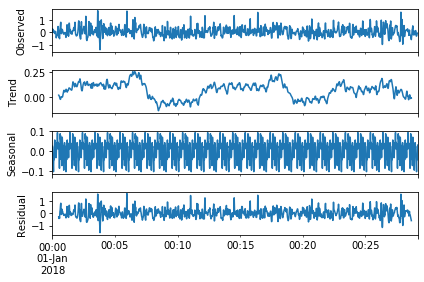

In [36]:
# Your code here:
from statsmodels.tsa.seasonal import seasonal_decompose

my_graph = seasonal_decompose(sensor['userAcceleration.x'], freq = 60).plot()


Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

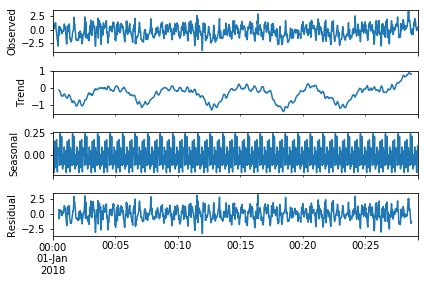

In [37]:
my_graph2 = seasonal_decompose(sensor['rotationRate.x'], freq = 60).plot()

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

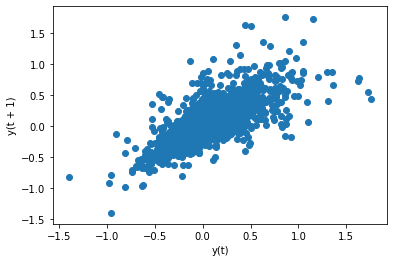

In [39]:
# Your code here:
from pandas.plotting import lag_plot

lag_plot(sensor['userAcceleration.x'])


Create a lag plot for `rotationRate.x`

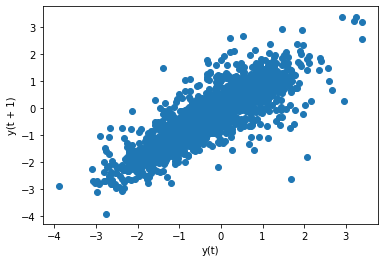

In [40]:
# Your code here:
lag_plot(sensor['rotationRate.x'])


What are your conclusions from both visualizations?

In [41]:
# Your conclusions here:
# They appear to be Autocorrelated. Both have a positive autocorrelation, and in general, the data points that are closer together IN TIME, are also closer together IN VALUE. Our conclusion is that time is a major factor in the value outputs for each of these columns - userAcceleration and rotationRate.


The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [42]:
# Your code here:
from statsmodels.tsa.stattools import adfuller

user_accel_p_val = adfuller(sensor['userAcceleration.x'])[1] # return the p-value
rotate_p_val = adfuller(sensor['rotationRate.x'])[1] # return the p-value

print(f"""
    The null hypothesis for each is that the data is not stationary.
    The p-value for User Acceleration is {user_accel_p_val}.
    The p-value for Rotation Rate is {rotate_p_val}.
""")



    The null hypothesis for each is that the data is not stationary.
    The p-value for User Acceleration is 2.823439483037483e-30.
    The p-value for Rotation Rate is 6.320230335911768e-06.



What are your conclusions from this test?

In [43]:
# Your conclusions here:
print('Based on these extremely low p-values, both are well below the alpha of 0.05, so we reject the null hypothesis, and say that the data is not stationary.')



Based on these extremely low p-values, both are well below the alpha of 0.05, so we reject the null hypothesis, and say that the data is not stationary.


Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [48]:
# Your code here:
from statsmodels.tsa.arima_model import ARMA

train = sensor['userAcceleration.x'][:-10]
test = sensor['userAcceleration.x'][-10:]

model = ARMA( # build my model up, the generic formula with the coefficients computed from my data
    train, # our training data from above
#     freq = 'H', # go by minute
    order = (2, 1), # p is the number of lag periods you are comparing to, q is the degree of white noise you are introducting into the model. These are the standards, have to do digging on your own if you feel like changing these
).fit() # 


In [49]:
model

In [50]:
predictions = model.predict( # .predict() method is pretty common on lots of Models we'll be using
    start = len(train), # in terms of index, where do we want to start and end? start at the END of your training data
    end = len(train) + len(test) - 1, # and end at the END of our testing data
)

pd.DataFrame({
    'observed' : test, # our last couple observations
    'predicted' : predictions, # my predictions for that test data
})

,observed,predicted
2018-01-01 00:29:01,0.149749,0.173149
2018-01-01 00:29:02,0.038461,0.142896
2018-01-01 00:29:03,-0.169175,0.100522
2018-01-01 00:29:04,-0.300361,0.070106
2018-01-01 00:29:05,-0.270174,0.056099
2018-01-01 00:29:06,-0.268367,0.053778
2018-01-01 00:29:07,-0.102444,0.056790
2018-01-01 00:29:08,-0.085590,0.060646
2018-01-01 00:29:09,-0.048105,0.063316
2018-01-01 00:29:10,-0.065011,0.064493


To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [51]:
# Your code here:
from statsmodels.tools.eval_measures import rmse

rmse(test, predictions) # test is the last 10 rows, and predicted is my predicted values


0.2252986381669172

In [53]:
print("Returns an extremely small value! which is a great sign that my Model accurately predicts the data!")

Returns an extremely small value! which is a great sign that my Model accurately predicts the data!


Curious about building a model for the rotationRate.x

In [55]:
train2 = sensor['rotationRate.x'][:-10]
test2 = sensor['rotationRate.x'][-10:]

model2 = ARMA(
    train2,
    order = (2, 1),
).fit()

predictions2 = model2.predict(
    start = len(train2),
    end = len(train2) + len(test2) - 1
)

print(pd.DataFrame({
    'observed' : test2,
    'predictions' : predictions2,  
}))

rmse(test2, predictions2)

                     observed  predictions
2018-01-01 00:29:01  1.065054     1.373041
2018-01-01 00:29:02  0.497726     0.890942
2018-01-01 00:29:03  0.426906     0.611922
2018-01-01 00:29:04  0.414523     0.384221
2018-01-01 00:29:05  0.027461     0.215089
2018-01-01 00:29:06 -0.123211     0.086477
2018-01-01 00:29:07 -0.057641    -0.010736
2018-01-01 00:29:08  0.343238    -0.084328
2018-01-01 00:29:09  0.470144    -0.140017
2018-01-01 00:29:10  0.291873    -0.182162


0.33849901198025323

My RMSE returns also, a very small RMSE value, giving me the clue that my model is quite accurate!